# Miniproject 1: Tic Tac Toe
This notebook contains the code for Miniproject 1.

## Setup
You can setup the environment by installing dependencies from our requirements.txt.
```sh
pip install -r requirements.txt
```

In [1]:
# Imports
import numpy as np
from collections import defaultdict
from pathlib import Path
import matplotlib.pyplot as plt
from utils import play, save_stats, read_stats, highest_m_values
from plotting import plot_average_rewards, plot_heatmaps, plot_m_values, plot_rewards_and_losses
from qlearner import QPlayer
from deepqlearner import DeepQPlayer, DeepQNetwork, ReplayMemory
from tic_env import OptimalPlayer

# Throught our code we save our answers and artifacts in the following paths
Path('answers').mkdir(exist_ok=True)
Path('artifacts').mkdir(exist_ok=True)

## Q-Learning

#### Question 1

In [2]:
epsilons = [0.01, 0.1, 0.2, 0.5, 0.75]

In [ ]:
q1_players = []

for eps in epsilons:
    suboptimal_player = OptimalPlayer(epsilon=0.5)
    q_player = QPlayer(epsilon=eps)
    play(suboptimal_player, q_player, episodes=20000)
    q1_players.append(q_player)

save_stats(players=q1_players, path='answers/Q1.npy')

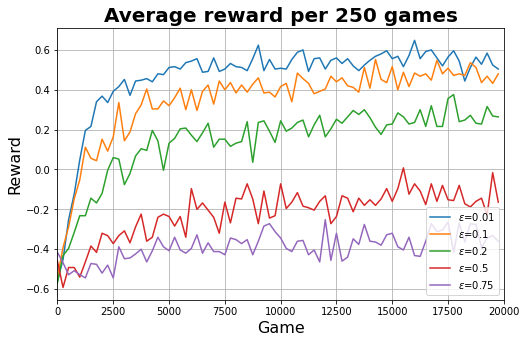

In [9]:
labels = [f'$\epsilon$={eps}' for eps in epsilons]
plot_average_rewards('answers/Q1.npy', labels=labels, save_path='artifacts/fig_Q1.pdf')

#### Question 2

In [5]:
n_stars = [1, 100, 1000, 10000, 40000]

In [ ]:
EPS_MIN = 0.1
EPS_MAX = 0.8

q2_players = []

for n_star in n_stars:
    get_epsilon = lambda n, n_star=n_star: max(EPS_MIN, EPS_MAX * (1 - n / n_star))
    suboptimal_player = OptimalPlayer(epsilon=0.5)
    q_player = QPlayer(epsilon=get_epsilon)
    play(suboptimal_player, q_player, episodes=20000)
    q2_players.append(q_player)
    
save_stats(players=q2_players, path='answers/Q2.npy')

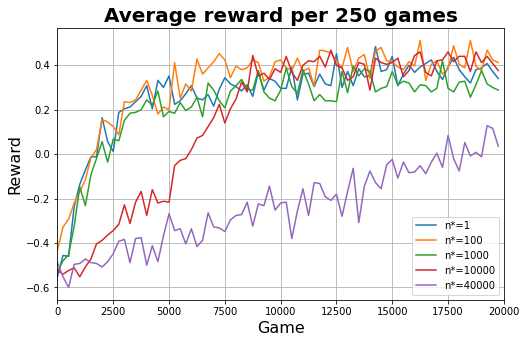

In [11]:
labels = [f'n*={n_star}' for n_star in n_stars]
plot_average_rewards(stats_path='answers/Q2.npy', labels=labels, save_path='artifacts/fig_Q2.pdf')

#### Question 3

In [7]:
n_stars = [1, 100, 1000, 10000, 40000]

In [ ]:
EPS_MIN = 0.1
EPS_MAX = 0.8

q3_players = []

for n_star in n_stars:
    get_epsilon = lambda n, n_star=n_star: max(EPS_MIN, EPS_MAX * (1 - n / n_star))
    suboptimal_player = OptimalPlayer(epsilon=0.5)
    q_player = QPlayer(epsilon=get_epsilon, test_every=250)
    play(suboptimal_player, q_player, episodes=20000)
    q3_players.append(q_player)
    
save_stats(players=q3_players, path='answers/Q3.npy')

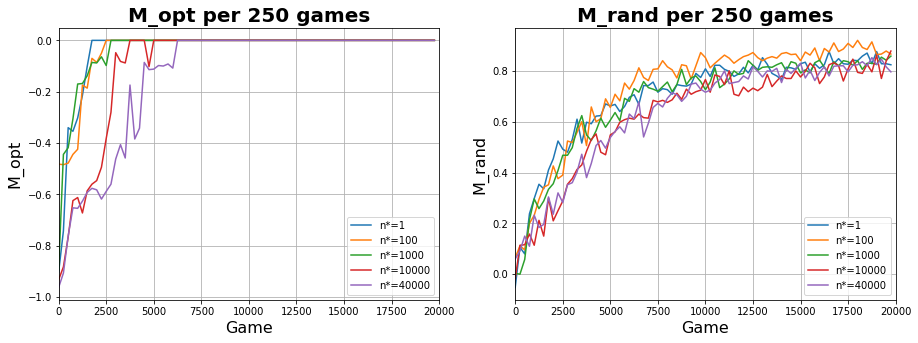

In [13]:
labels = [f"n*={n_star}" for n_star in n_stars]
plot_m_values(stats_path='answers/Q3.npy', labels=labels, save_path='artifacts/fig_Q3.pdf')

#### Question 4

In [9]:
opt_epsilons = [0, 0.01, 0.1, 0.25, 0.5, 0.75, 1]

In [ ]:
N_STAR = 100
EPS_MIN = 0.1
EPS_MAX = 0.8
q_epsilon = lambda n: max(EPS_MIN, EPS_MAX * (1 - n / N_STAR))

q4_players = []

for opt_eps in opt_epsilons:
    other_player = OptimalPlayer(epsilon=opt_eps)
    q_player = QPlayer(epsilon=q_epsilon, test_every=250)
    play(other_player, q_player, episodes=20000)
    q4_players.append(q_player)
    
save_stats(players=q4_players, path='answers/Q4.npy')

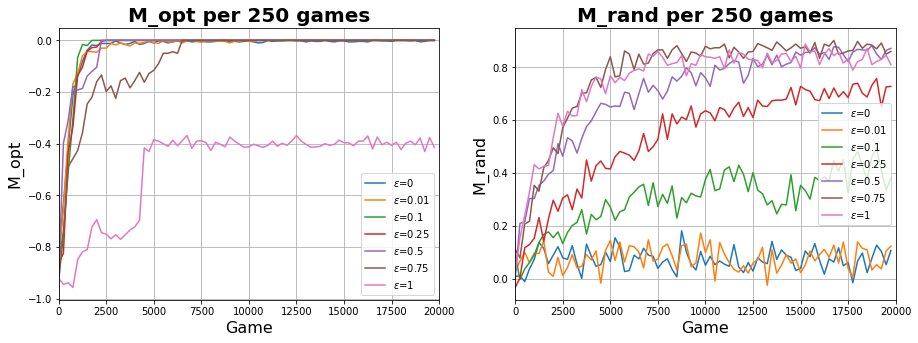

In [16]:
labels = [f'$\epsilon$={eps}' for eps in opt_epsilons]
plot_m_values(stats_path='answers/Q4.npy', labels=labels, save_path='artifacts/fig_Q4.pdf')

#### Question 5

In [2]:
stats = read_stats('answers/Q4.npy')
highest_m_values(stats)


{'m_opt': 0.0, 'm_rand': 0.918}

#### Question 7

In [11]:
epsilons = [0.01, 0.1, 0.2, 0.5]

In [ ]:
q7_players = []

for eps in epsilons:
    qvalues = defaultdict(int)
    q_player1 = QPlayer(epsilon=eps, qvalues=qvalues, test_every=250)
    q_player2 = QPlayer(epsilon=eps, qvalues=qvalues, test_every=250)
    play(q_player1, q_player2, episodes=20000)
    q7_players.append(q_player1)

save_stats(players=q7_players, path='answers/Q7.npy')

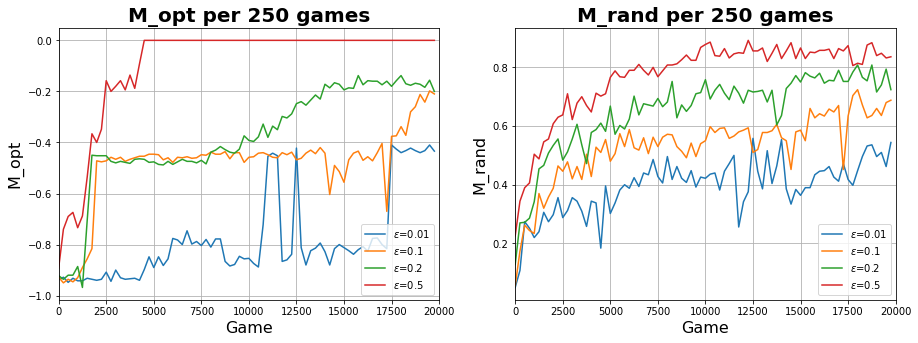

In [7]:
labels = [f'$\epsilon$={eps}' for eps in epsilons]
plot_m_values(stats_path='answers/Q7.npy', labels=labels, save_path='artifacts/fig_Q7.pdf')

#### Question 8

In [13]:
n_stars = [1, 100, 1000, 10000, 40000]

In [ ]:
EPS_MIN = 0.1
EPS_MAX = 0.8
q8_players = []

for n_star in n_stars:
    get_epsilon = lambda n, n_star=n_star: max(EPS_MIN, EPS_MAX * (1 - n / n_star))
    qvalues = defaultdict(int)
    q_player1 = QPlayer(epsilon=get_epsilon, qvalues=qvalues, test_every=250)
    q_player2 = QPlayer(epsilon=get_epsilon, qvalues=qvalues, test_every=250)
    play(q_player1, q_player2, episodes=20000)
    q8_players.append(q_player1)
    
save_stats(players=q8_players, path='answers/Q8.npy')

qvalues = [player.qvalues for player in q8_players]
# Save q-values for question 10
with open('answers/Q10.npy', 'wb') as npy:
    np.save(npy, qvalues)

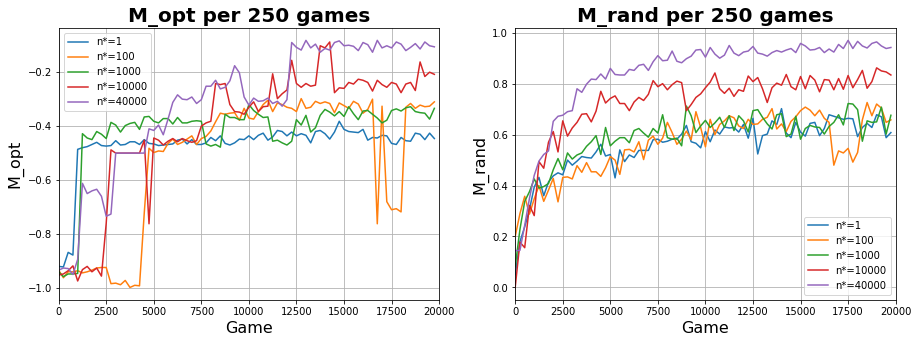

In [20]:
labels = [f'n*={n_star}' for n_star in n_stars]
plot_m_values(stats_path='answers/Q8.npy', labels=labels, save_path='artifacts/fig_Q8.pdf')

#### Question 9

In [3]:
stats = read_stats('answers/Q8.npy')
highest_m_values(stats)

{'m_opt': -0.082, 'm_rand': 0.97}

#### Question 10

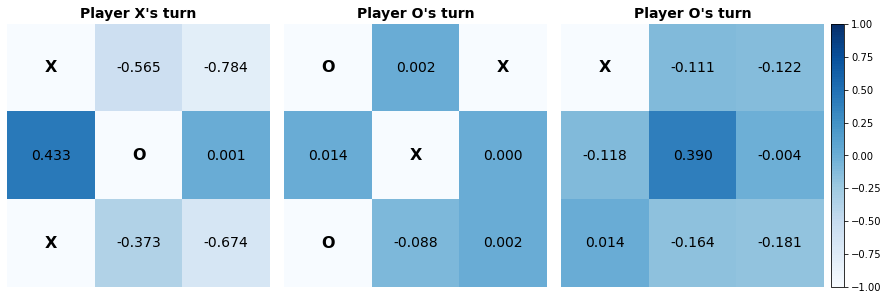

In [9]:
state1 = np.array([
    [1.0, 0.0, 0.0],
    [0.0, -1.0, 0.0],
    [1.0, 0.0, 0.0],
])

state2 = np.array([
    [-1.0, 0.0, 1.0],
    [0.0, 1.0, 0.0],
    [-1.0, 0.0, 0.0],
])

state3 = np.array([
    [1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0],
])

with open('answers/Q10.npy', 'rb') as npy:
    qvalues = np.load(npy, allow_pickle=True)

states_list = [state1, state2, state3]
# We take the player with n_star=40000
qvalues_list = [qvalues[4], qvalues[4], qvalues[4]]
titles=["Player X's turn", "Player O's turn", "Player O's turn"]
cmap = plt.cm.get_cmap('Blues', 100)

plot_heatmaps(states_list, qvalues_list, titles=titles, cmap=cmap, save_path='artifacts/fig_Q10.pdf')

## Deep Q-Learning

#### Question 11

In [15]:
epsilons = [0.001, 0.01, 0.1, 0.2]

In [ ]:
q11_players = []

for eps in epsilons:
    suboptimal_player = OptimalPlayer(epsilon=0.5)
    q_player = DeepQPlayer(epsilon=eps)
    play(suboptimal_player, q_player, episodes=20000)
    q11_players.append(q_player)

save_stats(players=q11_players, path='answers/Q11.npy')

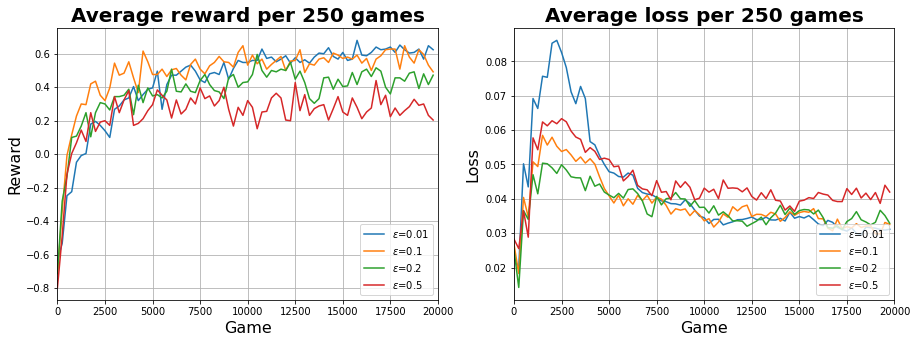

In [12]:
labels = [f'$\epsilon$={eps}' for eps in epsilons]
plot_rewards_and_losses(stats_path='answers/Q11.npy', labels=labels, save_path='artifacts/fig_Q11.pdf')

#### Question 12

In [17]:
epsilons = [0.001, 0.01, 0.1, 0.2]

In [ ]:
q12_players = []

for eps in epsilons:
    suboptimal_player = OptimalPlayer(epsilon=0.5)
    q_player = DeepQPlayer(epsilon=eps, batch_size=1, memory_capacity=1)
    play(suboptimal_player, q_player, episodes=20000)
    q12_players.append(q_player)

save_stats(players=q12_players, path='answers/Q12.npy')

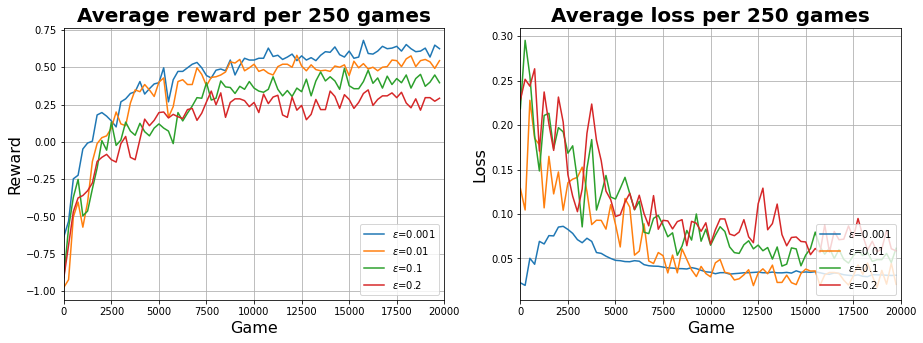

In [15]:
labels = [f'$\epsilon$={eps}' for eps in epsilons]
plot_rewards_and_losses(stats_path='answers/Q12.npy', labels=labels, save_path='artifacts/fig_Q12.pdf')

#### Question 13

In [19]:
n_stars = [1, 100, 1000, 10000, 40000]

In [ ]:
EPS_MIN = 0.1
EPS_MAX = 0.8

q13_players = []

for n_star in n_stars:
    suboptimal_player = OptimalPlayer(epsilon=0.5)
    q_player = DeepQPlayer(epsilon=lambda n, n_star=n_star: max(EPS_MIN, EPS_MAX * (1 - n / n_star)))
    play(suboptimal_player, q_player, episodes=20000)
    q13_players.append(q_player)

save_stats(players=q13_players, path='answers/Q13.npy')

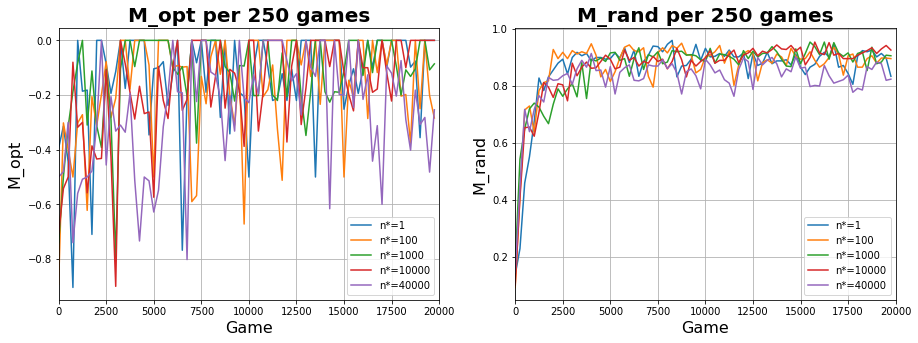

In [19]:
labels = [f"n*={n_star}" for n_star in n_stars]
plot_m_values(stats_path='answers/Q13.npy', labels=labels, save_path='artifacts/fig_Q13.pdf')

#### Question 14

In [21]:
epsilons = [0, 0.01, 0.1, 0.5, 1]

In [ ]:
EPS_MIN = 0.1
EPS_MAX = 0.8
N_STAR = 100

q14_players = []

for eps in epsilons:
    other_player = OptimalPlayer(epsilon=eps)
    q_player = DeepQPlayer(epsilon=lambda n: max(EPS_MIN, EPS_MAX * (1 - n / N_STAR)))
    play(other_player, q_player, episodes=20000)
    q14_players.append(q_player)

save_stats(players=q14_players, path='answers/Q14.npy')

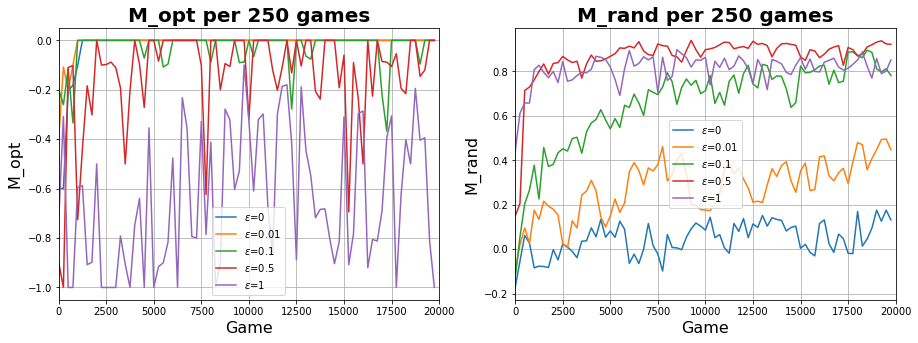

In [22]:
labels = [f'$\epsilon$={eps}' for eps in epsilons]
plot_m_values(stats_path='answers/Q14.npy', labels=labels, save_path='artifacts/fig_Q14.pdf')

#### Question 15

In [4]:
stats = read_stats('answers/Q14.npy')
highest_m_values(stats)

{'m_opt': 0, 'm_rand': 0.94}

#### Question 16

In [23]:
epsilons = [0.01, 0.1, 0.2, 0.5]

In [ ]:
q16_players = []

for eps in epsilons:
    memory = ReplayMemory()
    policy_net = DeepQNetwork()
    target_net = DeepQNetwork()
    q_player1 = DeepQPlayer(epsilon=eps, policy_net=policy_net, target_net=target_net, memory=memory)
    q_player2 = DeepQPlayer(epsilon=eps, policy_net=policy_net, target_net=target_net, memory=memory, log=False, do_optimize=False)
    play(q_player1, q_player2, episodes=20000)
    q16_players.append(q_player1)

save_stats(players=q16_players, path='answers/Q16.npy')

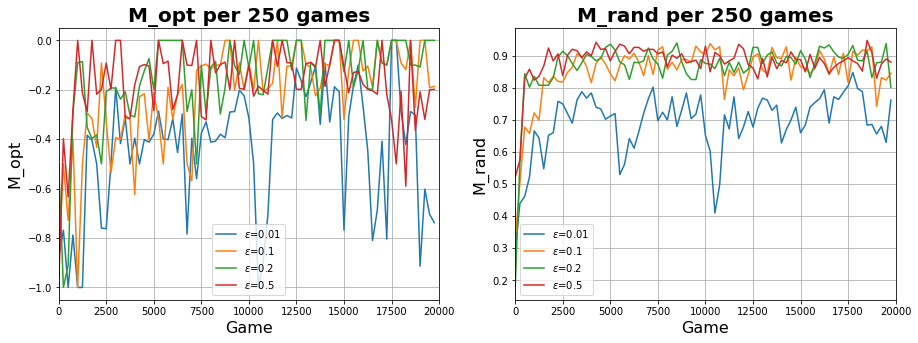

In [25]:
labels = [f'$\epsilon$={eps}' for eps in epsilons]
plot_m_values(stats_path='answers/Q16.npy', labels=labels, save_path='artifacts/fig_Q16.pdf')

#### Question 17

In [25]:
n_stars = [1, 100, 1000, 10000, 20000, 40000]

In [ ]:
EPS_MIN = 0.1
EPS_MAX = 0.8

q17_players = []

for n_star in n_stars:
    memory = ReplayMemory()
    policy_net = DeepQNetwork()
    target_net = DeepQNetwork()
    epsilon = lambda n, n_star=n_star: max(EPS_MIN, EPS_MAX * (1 - n / n_star))
    q_player1 = DeepQPlayer(epsilon=epsilon, policy_net=policy_net, target_net=target_net, memory=memory)
    q_player2 = DeepQPlayer(epsilon=epsilon, policy_net=policy_net, target_net=target_net, memory=memory, log=False, do_optimize=False)
    play(q_player1, q_player2, episodes=20000)
    q17_players.append(q_player1)

    # Save pretrained model for Question 19
    q_player1.save_pretrained(f"artifacts/q_player_nstar{n_star}")

save_stats(players=q17_players, path='answers/Q17.npy')

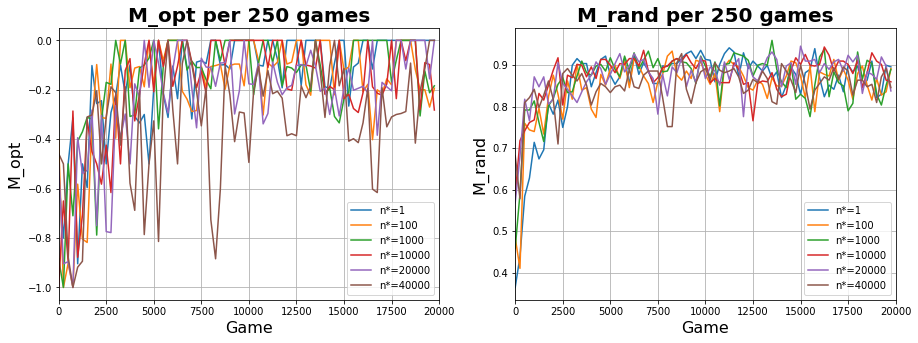

In [28]:
labels = [f"n*={n_star}" for n_star in n_stars]
plot_m_values(stats_path='answers/Q17.npy', labels=labels, save_path='artifacts/fig_Q17.pdf')

#### Question 18

In [5]:
stats = read_stats('answers/Q17.npy')
highest_m_values(stats)

{'m_opt': 0, 'm_rand': 0.96}

#### Question 19

In [12]:
import numpy as np

# We are looking at 2 grids, one normal grid and
# a tricky one where the optimal move depends on whether the player is X or O
x_grid = np.array([
    [1.0, 0.0, 0.0],
    [0.0, -1.0, 0.0],
    [1.0, 0.0, 0.0],
])

tricky_grid = np.array([
    [0.0, 0.0, -1.0],
    [0.0, 1.0, -1.0],
    [0.0, 1.0, 0.0],
])

grids = [x_grid, tricky_grid, tricky_grid]

titles=["Player O's turn", "Player X's turn", "Player O's turn"]
cmap = plt.cm.get_cmap('Blues', 100)

In [ ]:
import torch
from qlearner import QStateAction

def get_qvalues(q_player, grid):
    qvalues = {}
    with torch.no_grad():
        predictions = q_player.policy_net(q_player.grid_to_state(grid).unsqueeze(0)).squeeze().numpy()
        for action in range(9):
            qvalues[QStateAction(grid, (action//3, action%3))] = predictions[action]
    return qvalues

q_player = DeepQPlayer.from_pretrained("artifacts/q_player_nstar1000")

qvalues_list = []

# For this grid, we set the player to O (which is the next player in this situation)
q_player.set_player('O')
qvalues_list.append(get_qvalues(q_player, x_grid))

# For the tricky grid, we first set it to X which is the only next player
# in this project because X always goes first
q_player.set_player('X')
qvalues_list.append(get_qvalues(q_player, tricky_grid))

# Next, we set it to O which can also be a next player for this grid
# but in this project this situation is never encountered
# however results show that our agent has in fact learned both
q_player.set_player('O')
qvalues_list.append(get_qvalues(q_player, tricky_grid))

with open('answers/Q19.npy', 'wb') as npy:
    np.save(npy, qvalues_list)

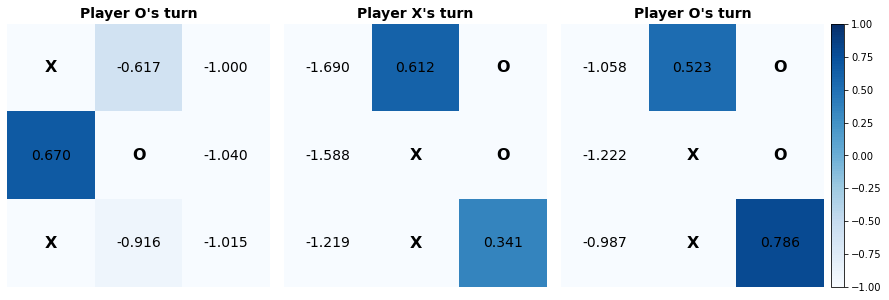

In [13]:
with open('answers/Q19.npy', 'rb') as npy:
    qvalues = np.load(npy, allow_pickle=True)

plot_heatmaps(grids, qvalues, titles=titles, cmap=cmap, save_path='artifacts/fig_Q19.pdf')

#### Question 20

Best M_rand and M_opt

In [8]:
q_experts = ['answers/Q3.npy', 'answers/Q4.npy']
q_self_practice = ['answers/Q7.npy', 'answers/Q8.npy']
deep_q_experts = ['answers/Q13.npy', 'answers/Q14.npy']
deep_q_self_practice = ['answers/Q16.npy', 'answers/Q17.npy']

def get_highest_m_values(players):
    m_opts = []
    m_rands = []

    for player in players:
        stats = read_stats(player)
        m_values = highest_m_values(stats)
        m_opts.append(m_values['m_opt'])
        m_rands.append(m_values['m_rand'])

    return {'m_opt': max(m_opts), 'm_rand': max(m_rands)}

print('Q-Learning experts:')
print(get_highest_m_values(q_experts))

print('Q-Learning self-practice:')
print(get_highest_m_values(q_self_practice))

print('Deep Q-Learning experts:')
print(get_highest_m_values(deep_q_experts))

print('Deep Q-Learning self-practice:')
print(get_highest_m_values(deep_q_self_practice))

Q-Learning experts:
{'m_opt': 0.0, 'm_rand': 0.918}
Q-Learning self-practice:
{'m_opt': 0, 'm_rand': 0.97}
Deep Q-Learning experts:
{'m_opt': 0, 'm_rand': 0.96}
Deep Q-Learning self-practice:
{'m_opt': 0, 'm_rand': 0.96}


Best training time

In [10]:
def find_index_greater_than(values1, values2, threshold1, threshold2):
    for i, (value1, value2) in enumerate(zip(values1, values2)):
        if value1 >= threshold1 and value2 >= threshold2:
            return i
    return -1

def best_training_time(stats):
    train_indices = []

    for stat in stats:
        highest_m_rand = max(stat['m_rand'])
        highest_m_opt = max(stat['m_opt'])
        train_index = find_index_greater_than(stat['m_rand'], stat['m_opt'], highest_m_rand * 0.8, highest_m_opt-0.2)
        train_indices.append(train_index)
    
    return min(train_indices) * 250

def get_best_training_time(players):
    train_times = []

    for player in players:
        stats = read_stats(player)
        train_times.append(best_training_time(stats))

    return min(train_times)

print('Q-Learning experts:')
print(get_best_training_time(q_experts))

print('Q-Learning self-practice:')
print(get_best_training_time(q_self_practice))

print('Deep Q-Learning experts:')
print(get_best_training_time(deep_q_experts))

print('Deep Q-Learning self-practice:')
print(get_best_training_time(deep_q_self_practice))

Q-Learning experts:
4000
Q-Learning self-practice:
4250
Deep Q-Learning experts:
1250
Deep Q-Learning self-practice:
1000
